In [3]:
import quandl
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm
import matplotlib.pyplot as plt

/Users/zuba818/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
df = pd.read_excel("/Users/zuba818/Downloads/Stock_Data/stock-all.xls", sheet_name='stock')

In [13]:
df_stock_1 = df[df.stock_id == 1].copy()
df_stock_11 = df[df.stock_id == 11].copy()
df_stock_13 = df[df.stock_id == 13].copy()
df_stock_23 = df[df.stock_id == 23].copy()
df_stock_293 = df[df.stock_id == 293].copy()
df_stock_1.tail()
#13 hangseng
#23 East Asisbank

,stock_id,tdate,open,close,high,low,volume
1851,1,2007-02-13,105.7,101.1,105.7,101.1,6394500
1852,1,2007-02-14,102.8,101.3,103.1,100.5,4035000
1853,1,2007-02-15,102.6,102.5,103.8,101.3,4995800
1854,1,2007-02-16,102.5,101.5,102.2,100.2,5131800
1855,1,2007-02-21,101.7,100.6,102.2,100.6,3346800


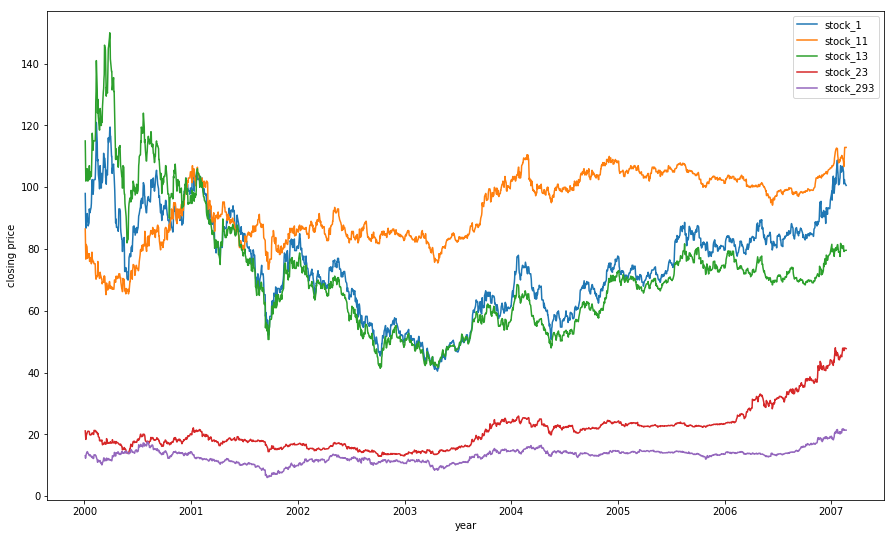

In [13]:
plt.plot(df_stock_1.tdate, df_stock_1.close,label = 'stock_1')
plt.plot(df_stock_11.tdate, df_stock_11.close,label = 'stock_11')
plt.plot(df_stock_13.tdate, df_stock_13.close,label = 'stock_13')
plt.plot(df_stock_23.tdate, df_stock_23.close,label = 'stock_23')
plt.plot(df_stock_293.tdate, df_stock_293.close,label = 'stock_293')
plt.xlabel("year")
plt.ylabel("closing price")
plt.legend(loc='upper right')

In [14]:
df.describe()


,stock_id,open,close,high,low,volume
count,11068.000000,11068.000000,11068.000000,11068.000000,11068.000000,1.106800e+04
mean,195.628117,46.638477,46.623703,47.052904,46.183871,2.094519e+07
std,308.090381,36.508613,36.492517,36.817295,36.174758,6.183043e+07
min,1.000000,1.110000,1.110000,1.160000,1.100000,0.000000e+00
25%,11.000000,13.587500,13.550000,13.650000,13.450000,2.379075e+06
50%,13.000000,44.000000,43.900000,44.400000,43.425000,4.636750e+06
75%,293.000000,80.750000,80.750000,81.500000,80.000000,9.231050e+06
max,857.000000,150.000000,150.000000,153.500000,149.000000,4.117606e+09


In [13]:
test.head()

,close,Prediction
0,98.00,108.5
1,91.25,109.0
2,86.75,107.0
3,88.50,104.0
4,89.25,101.5


In [14]:
test = df_stock_1[['close']]
forecast_out = int(30)
test['Prediction'] = test[['close']].shift(-forecast_out)
X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

/Users/zuba818/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [20]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)
# train
clf = LinearRegression()
clf.fit(X_train,y_train)
# test
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.7859032011699191


In [22]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[ 97.98017952  94.9062001   95.03608655  96.11847367  99.1924531
  97.54722467  98.15336146 100.05836279 101.35722734 104.21472934
 101.53040928 100.49131764  98.93268019  97.28745176  97.63381564
  98.84608922  99.1924531  101.44381831 102.65609188 100.83768152
 102.04995509 101.27063637 102.04995509 102.48290994 100.92427249
  97.54722467  97.72040661  98.75949825  97.89358855  97.11426982]


Text(0,0.5,'price')

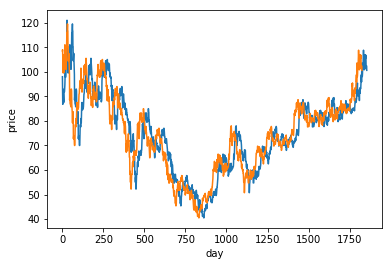

In [41]:
plt.plot(test)
plt.xlabel("day")
plt.ylabel("price")

Text(0,0.5,'price')

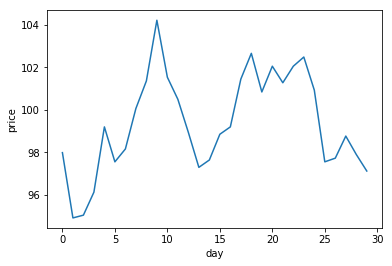

In [42]:
plt.plot(forecast_prediction)
plt.xlabel("day")
plt.ylabel("price")